# HSE 2023: Введение в машинное обучение БИ 22/23

## Домашнее задание № 3


# Внимание!

* Некоторые задания требуют значительного времени для выполнения (особенно часть с лемматизацией), поэтому **лучше приступить к выполнению домашнего задания как можно раньше**

* Решения обязательно должны содержать комментарии, все полученные результаты должны сопровождаться выводами (для этого удобно использовать ячейки markdown)

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from typing import Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=467e94ca6aa25d61a8678b8be2e2b23a6ab1747d3e9396bddfcb9271cc5d7e8f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import string
import nltk   # Natural Language Toolkit
from nltk.stem.snowball import SnowballStemmer
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


## Часть 3: Natural Language Processing

#### 7. [1.75 балла] Подготовка данных

Подготовим набор данных, который будем использовать для бинарной и многоклассовой классификации.

0. Выберите **шесть** любимых писателей-прозаиков (укажите, кого вы выбрали) и скачайте  <a href="https://www.kaggle.com/d0rj3228/russian-literature?select=prose">данные</a> из раздела **проза**
1. Подготовьте собственный датасет из выбранных авторов:
    * разделите каждый текст на предложения так, чтобы представить данные в виде *предложение* and *автор* (каждая строка обучающего набора данных содержит ровно одно предложение и одного автора текста, откуда было взято это предложение);
    * удалите короткие предложения (считаем, что предложение короткое, если в нем меньше 15 символов);
    * зафиксируйте random state и случайно сформируйте выборку из предложений размера "5k : 15k : 8k : 11k : 20k : 3k" в разбивке по авторам соответственно;
    
    Пример полученных данных:
    
    <center>
    <table>
        <tr>
            <th> sentence </th>
            <th> author </th>
        </tr>
        <tr><td> Несколько лет тому назад в одном из своих поместий жил старинный русской барин, Кирила Петрович Троекуров. </td><td> Пушкин </td><td>
        <tr><td> Уже более недели приезжий господин жил в городе, разъезжая по вечеринкам и обедам и таким образом проводя, как говорится, очень приятно время. </td><td> Гоголь </td><td>
        <tr><td> ... </td><td> ... </td><td>
        <tr><td> Я жил недорослем, гоняя голубей и играя в чехарду с дворовыми мальчишками. </td><td> Пушкин </td><td>         
    </table>
</center>
     
2. Предварительная обработка данных:
    * токенизируйте предложения, удалите все стоп-слова (nltk.corpus.stopwords), знаки пунктуации (string.punctuation) и числа;
    * преобразуйте все символы в нижний регистр и примените стемминг или лемматизацию (на свое усмотрение)
    * постройте векторные представления предложений с помощью **bag of words** и **tf-idf** (используйте средства sklearn)
    * обратите внимание на разницу между полученными векторными представлениями: чем отличаются векторы, полученные с помощью **bag of words** и **tf-idf**?

**Загрузка данных**

In [ ]:
! wget https://github.com/d0rj/RusLit/tree/main/prose/Dostoevsky

--2023-05-12 16:42:37--  https://github.com/d0rj/RusLit/tree/main/prose/Dostoevsky
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Dostoevsky’

Dostoevsky              [ <=>                ] 168.77K  --.-KB/s    in 0.07s   

2023-05-12 16:42:37 (2.22 MB/s) - ‘Dostoevsky’ saved [172822]



In [ ]:
#https://stackoverflow.com/questions/59564862/download-a-single-folder-or-directory-from-a-github-repo-to-colab
!apt install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

In [ ]:
!svn co -q https://github.com/d0rj/RusLit #это checkout, чтобы загрузить данные в коллаб

In [ ]:
import os #для работы с файлами в коллабе

In [ ]:
path = '/content/RusLit/trunk/prose'
prose = os.listdir(path)
prose[0]

'Turgenev'

In [ ]:
writers = []
for writer in prose:
  writers.append(writer)
writers

['Turgenev',
 'Herzen',
 'Gorky',
 'Tolstoy',
 'Chekhov',
 'Blok',
 'Lermontov',
 'Pushkin',
 'Dostoevsky',
 'Gogol',
 'Bryusov']

In [ ]:
#выбираю 6 нужных
writers = ['Tolstoy', 'Pushkin',
 'Herzen', 'Dostoevsky',
 'Turgenev', 'Gorky']

In [ ]:
#получаем книжки каждого автора вот так
for writer in writers:
  path_wr = path + '/' + writer
  books = os.listdir(path_wr)
  print(books)

['Работник Емельян и пустой барабан.txt', 'Казаки.txt', 'Декабристы.txt', 'Хозяин и работник.txt', 'Война и мир. Том 2.txt', 'Поликуша.txt', 'Анна Каренина.txt', 'Набег.txt', 'info.csv', 'Смерть Ивана Ильича.txt', 'Кавказский пленник.txt', 'Семейное счастье.txt', 'Детство.txt', 'Севастополь в декабре месяце.txt', 'Праведный судья.txt', 'Записки маркера.txt', 'Ягоды.txt', 'Алёша горшок.txt', 'Три смерти.txt', 'Метель.txt', 'Рубка леса.txt', 'Утро пемещика.txt', 'Разжалованный.txt', 'Записки сумасшедшего.txt', 'Война и мир. Том 1.txt', 'Воскресение.txt', 'Севастополь в мае.txt', 'Дьявол.txt', 'Война и мир. Том 4.txt', 'Отец Сергий.txt', 'Крейцерова соната.txt', 'Юность.txt', 'Севастополь в августе 1855 года.txt', 'Альберт.txt', 'Война и мир. Том 3.txt', 'Два гусара.txt', 'Из записок князя Д. Нехлюдова (Люцерн).txt', 'Отрочество.txt', 'Божеское и человеческое.txt', 'После бала.txt', 'Холстомер.txt', 'Корней Васильев.txt', 'Хаджи-Мурат.txt']
['Капитанская дочка.txt', 'Арап Петра Великого.t

In [ ]:
#Вытаскиваем текст вот так
for writer in writers:
  path_wr = path + '/' + writer
  books = os.listdir(path_wr)
  for book in books:
    if book != 'info.csv':
      path_book = path_wr + '/' + book
      with open(path_book, 'r') as file:
        booktext = file.read()
        if book == 'Холстомер.txt': #просто чтобы напечатать текст
          print(booktext[:1000])
          sample_text = booktext[:3000]

Лев Николаевич Толстой

Холстомер
История лошади

  
Посвящается памяти М. А. Стаховича

   [Сюжет этот был задуман М. А. Стаховичем, автором "Ночного" и "Наездники", и передан автору А. А. Стаховичем. -- Прим. Л. Н. Толстого)]
Глава I

   Все выше и выше поднималось небо, шире расплывалась заря, белее становилось матовое серебро росы, безжизненнее становился серп месяца, звучнее -- лес, люди начинали подниматься, и на барском конном дворе чаще и чаще слышалось фырканье, возня по соломе и даже сердитое визгливое ржанье столпившихся и повздоривших за что-то лошадей.
   -- Но-о! успеешь! проголодались! -- сказал старый табунщик, отворяя скрипящие ворота. -- Куда? -- крикнул он, замахиваясь на кобылку, которая сунулась было в ворота.
   Табунщик Нестер был одет в казакин, подпоясанный ремнем с набором, кнут у него был захлестнут через плечо, и хлеб в полотенце был за поясом. В руках он нес седло и уздечку.
   Лошади нисколько не испугались и не оскорбились насмешливым топом табунщика, они

**Делим на предложения**

In [ ]:
writers_sentences = []
sentences = []
for writer in writers:
  path_wr = path + '/' + writer
  books = os.listdir(path_wr)
  for book in books:
    if book != 'info.csv':
      path_book = path_wr + '/' + book
      with open(path_book, 'r') as file:
        booktext = file.read()
        booktext_split = booktext.replace('\n', ' ').replace('!','.').replace('?','.').split('. ')
        sentences += booktext_split
        writers_sentences += [writer]*len(booktext_split)

print(writers_sentences[:5])
print(sentences[:5])
print(len(writers_sentences), len(sentences))

['Tolstoy', 'Tolstoy', 'Tolstoy', 'Tolstoy', 'Tolstoy']
['Жил Емельян у хозяина в работниках', 'Идет раз Емельян по лугу на работу, глядь -- прыгает перед ним лягушка; чуть-чуть не наступил на нее', 'Перешагнул через нее Емельян', 'Вдруг слышит, кличет его кто-то сзади', 'Оглянулся Емельян, видит -- стоит красавица девица и говорит ему:    -- Что ты, Емельян, не женишься']
327661 327661


In [ ]:
df = pd.DataFrame({'sentence': sentences,
     'author': writers_sentences})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327661 entries, 0 to 327660
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  327661 non-null  object
 1   author    327661 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [ ]:
df.head(2)

,sentence,author
0,Жил Емельян у хозяина в работниках,Tolstoy
1,"Идет раз Емельян по лугу на работу, глядь -- п...",Tolstoy


In [ ]:
df.sentence = df.sentence.apply(lambda x: x.strip()) #на всякий случай уберем пробелы по бокам
df.head(2)

,sentence,author
0,Жил Емельян у хозяина в работниках,Tolstoy
1,"Идет раз Емельян по лугу на работу, глядь -- п...",Tolstoy


**Удаляем короткие предложения**

удалите короткие предложения (считаем, что предложение короткое, если в нем меньше 15 символов);

In [ ]:
df[df.sentence.str.len() < 15].head()

,sentence,author
13,Женимся,Tolstoy
14,Куда ж пойдем,Tolstoy
39,Пошел Емельян,Tolstoy
52,Только работай,Tolstoy
59,Прошла неделя,Tolstoy


In [ ]:
df = df[df.sentence.str.len() >= 15]
df.head(1)

,sentence,author
0,Жил Емельян у хозяина в работниках,Tolstoy


In [ ]:
df[df.sentence.str.len() < 15].head()

,sentence,author


In [ ]:
df.author.value_counts()

Dostoevsky    108054
Tolstoy        91938
Gorky          49500
Turgenev       22909
Pushkin         9989
Herzen          9672
Name: author, dtype: int64

**Формируем выборку**

зафиксируйте random state и случайно сформируйте выборку из предложений размера "5k : 15k : 8k : 11k : 20k : 3k" в разбивке по авторам соответственно;

In [ ]:
ratio = [20000, 5000, 3000, 15000, 8000, 11000] #

In [ ]:
writers

['Tolstoy', 'Pushkin', 'Herzen', 'Dostoevsky', 'Turgenev', 'Gorky']

In [ ]:
df_chosen = pd.DataFrame()

In [ ]:
for i in range(6):
  print(writers[i])
  df_chosen = df_chosen.append(df[df.author == writers[i]].sample(n=ratio[i], random_state=1), ignore_index=True)
df_chosen.head(1)

Tolstoy
Pushkin
Herzen
Dostoevsky
Turgenev
Gorky


<ipython-input-28-07735ed9680d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_chosen = df_chosen.append(df[df.author == writers[i]].sample(n=ratio[i], random_state=1), ignore_index=True)


,sentence,author
0,"Там нет новых лиц, но общество готово принять ...",Tolstoy


**Токенизируем**

токенизируйте предложения, удалите все стоп-слова (nltk.corpus.stopwords), знаки пунктуации (string.punctuation) и числа;

In [ ]:
#Для начала просто приведем все к нижнему регистру
df_chosen.sentence = df_chosen.sentence.apply(lambda x: x.lower())
df_chosen.head(2)

,sentence,author
0,"там нет новых лиц, но общество готово принять ...",Tolstoy
1,"наташа же была весела потому, что она слишком ...",Tolstoy


In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
 punctuation = string.punctuation + '–' #забыли про длинный тире, а его очень много в текстах
 punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–'

In [ ]:
word_tokenizer = nltk.WordPunctTokenizer()
def process_data(sent): #взято из семинара
    texts = []
    data = sent.split()
    for item in data:
        tokens = word_tokenizer.tokenize(item) # splits the text into tokens (words)
        tokens = [word for word in tokens if (word not in punctuation and word not in stop_words and word.isdigit() == False)]
        if len(tokens) != 0:
          texts.append(tokens[0]) # collect the text tokens
    return ' '.join(texts)

df_chosen['tokened'] = df_chosen.sentence.apply(process_data)
df_chosen.head(2)

,sentence,author,tokened
0,"там нет новых лиц, но общество готово принять ...",Tolstoy,новых лиц общество готово принять всякие новые...
1,"наташа же была весела потому, что она слишком ...",Tolstoy,наташа весела слишком долго грустна ничто напо...


**Преобразования и стемминг**

преобразуйте все символы в нижний регистр и примените стемминг или лемматизацию (на свое усмотрение)

In [ ]:
morph = pymorphy2.MorphAnalyzer() #вроде для русского лучше работает лемматизация. Тоже из семинара 8
def lemmatize(text):
  stemmed_text = ' '.join([morph.parse(x)[0].normal_form for x in text.split(' ')])
  return stemmed_text

In [ ]:
test_text = 'преобразуйте все символы в нижний регистр и примените стемминг или лемматизацию (на свое усмотрение)'
lemmatize(test_text)

'преобразовать всё символ в нижний регистр и применить стемминг или лемматизация (на свой усмотрение)'

In [ ]:
df_chosen['lemmas'] = df_chosen.tokened.apply(lemmatize)
df_chosen.head(2)

,sentence,author,tokened,lemmas
0,"там нет новых лиц, но общество готово принять ...",Tolstoy,новых лиц общество готово принять всякие новые...,новый лицо общество готовый принять всякий нов...
1,"наташа же была весела потому, что она слишком ...",Tolstoy,наташа весела слишком долго грустна ничто напо...,наташа весёлый слишком долго грустный ничто на...


**Bow и tfidf**

постройте векторные представления предложений с помощью bag of words и tf-idf (используйте средства sklearn)

In [ ]:
vectorizer = CountVectorizer(max_features = 50)
vectorizer.fit(df_chosen.lemmas.tolist())

bow_texts = vectorizer.transform(df_chosen.lemmas)
bow_texts.todense()[:-2]

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
bow_texts.sum()  #это проверяю, что bow не нулевой

90206

In [ ]:
tf_vectorizer = TfidfVectorizer(max_features = 100)
tf_vectorizer.fit(df_chosen.lemmas.tolist())

tfidf  = tf_vectorizer.transform(df_chosen.lemmas)
tfidf.todense()[:-2]

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.21769259],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.26145252,
         0.        ]])

In [ ]:
tfidf.sum()  #это проверяю, что tfidf не нулевой

68950.6979369184

**Обращаем внимание на разницу**

обратите внимание на разницу между полученными векторными представлениями: чем отличаются векторы, полученные с помощью bag of words и tf-idf?

In [ ]:
print('tf-idf', tfidf.shape, '\nbow', bow_texts.shape)

tf-idf (62000, 100) 
bow (62000, 50)


In [ ]:
"""
В Bow прежде всего единички и нолики, потому что текст - это массив ноликов и единичек,
где для каждого документа есть столбик а единичка на N месте означает, что слово встретилось.

В tf idf же представлены числа, каждое из которых показывает важность слова в документе. То есть в нем
мы можем нормально отличить самое популярное слово и 50-е по популярности слово
""";


###  Бинарная классификация

#### 8. [2 балла] Обучете логистическую регрессию (написанную вами реализацию) и SVC (реализацию SVM из sklearn)

* выберите **двух** любых авторов из сформированного в задании 7 набора данных
* проверьте, сбалансированны ли классы
* разделите данные на тренировочную и тестовую выборки, выделив под test 0.3 всех предложений (не забудьте зафиксировать random state)
* с помощью GridSearchCV найдите оптимальные гиперпараметры  моделей (согласно метрике F1 score) и используйте найденные гиперпараметры при выполнении следующих пунктов задания
* постройте графики зависимости F1 score от гиперпараметров
* постройте confusion matrix для train и test
* вычислите другие метрики качества для обученной модели (удобно воспользоваться реализацией из sklearn)
* проанализируйте полученные значения метрик, сделайте вывод о качестве обученной модели


In [ ]:
# выберите двух любых авторов из сформированного в задании 7 набора данных
df_train = df_chosen[(df_chosen.author == 'Dostoevsky') | (df_chosen.author == 'Gorky')]
df_train.author.value_counts(normalize=True) #классы почти сбалансированы, так что можно ничего не предпринимать

Dostoevsky    0.576923
Gorky         0.423077
Name: author, dtype: float64

In [ ]:
X_train_trash, X_test_trash, y_train, y_test = train_test_split(df_train.sentence, df_train.author, test_size=0.3, random_state=42)

In [ ]:
X_train  = tf_vectorizer.transform(X_train_trash)
X_test  = tf_vectorizer.transform(X_test_trash)

In [ ]:
opt = GridSearchCV(
    SVC(probability=True),
    {
        'C': (1e-3, 1e+3),
      #  'gamma': (1e-3, 1e+3), # их тоже можно перебрать, но у меня слишком долго грузилось =(
    #    'degree': (1, 3, 5),
        'kernel': ['linear', 'poly', 'rbf'],
    },
    scoring='f1_macro',
    refit=False,
    cv=3
)

opt.fit(X_train, y_train)
print(opt.best_params_)

{'C': 1000.0, 'kernel': 'rbf'}


In [ ]:
opt.cv_results_

{'mean_fit_time': array([ 15.34205715,  17.71852207,  24.85444204, 322.94966547,
         28.20911463,  26.74686464]),
 'std_fit_time': array([9.61751683e-02, 2.64233273e-01, 5.22543410e-02, 5.48343473e+01,
        1.87448192e+00, 1.35025760e-01]),
 'mean_score_time': array([0.78327235, 0.96402001, 1.65821481, 0.76109616, 0.87308145,
        1.5969878 ]),
 'std_score_time': array([0.0255963 , 0.01640136, 0.01186776, 0.02651588, 0.01531542,
        0.00303855]),
 'param_C': masked_array(data=[0.001, 0.001, 0.001, 1000.0, 1000.0, 1000.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'kernel': 'linear'},
  {'C': 0.001, 'kernel': 'poly'},
  {'C': 0.001, 'kernel': 'rbf'},
  {'C': 1000.0, 'kernel': '

In [ ]:
relevant_results = ['mean_test_score', 'std_test_score', 'params']

In [ ]:
optimal = SVC(kernel='rbf', C=1000.0, probability=True)
optimal.fit(X_train, y_train)
y_pred = optimal.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Dostoevsky       0.60      0.88      0.72      4481
       Gorky       0.57      0.21      0.30      3319

    accuracy                           0.60      7800
   macro avg       0.59      0.55      0.51      7800
weighted avg       0.59      0.60      0.54      7800



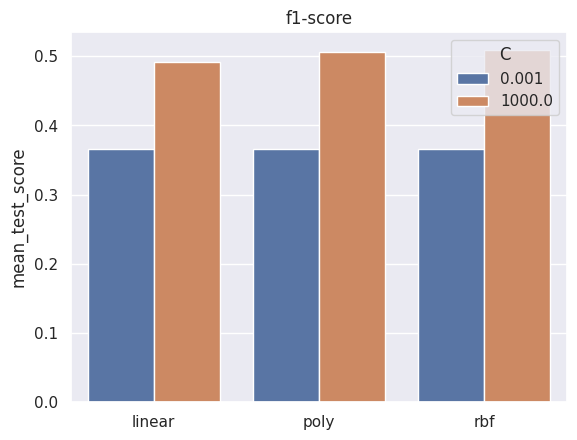

In [ ]:
#постройте графики зависимости F1 score от гиперпараметров
df = pd.DataFrame()
for key in relevant_results:

        df[key] = opt.cv_results_[key]

df['kernel'] = df.params.apply(lambda x: x['kernel'])
df['C'] = df.params.apply(lambda x: x['C'])


sns.barplot(x = "kernel", y = "mean_test_score", hue="C", data = df).set(title = 'f1-score', xlabel="");

In [ ]:
from sklearn.metrics import *

def show_results(test_y, pred, proba): #из сема
    print("Precision: {0:6.2f}".format(precision_score(test_y, pred, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(test_y, pred, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(test_y, pred, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(test_y, pred)))
    print("ROC-AUC: {0:6.2f}".format(roc_auc_score(test_y, proba[:,1]),))
    labels = ['negative','positive']

    #classification_report
    sns.heatmap(data=confusion_matrix(test_y, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix ")
    plt.show()

Precision:   0.59
Recall:   0.55
F1-measure:   0.51
Accuracy:   0.60
ROC-AUC:   0.56


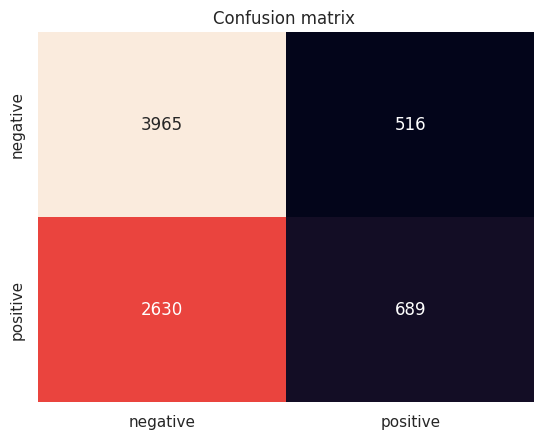

In [ ]:
#постройте confusion matrix для train и test
proba  = optimal.predict_proba(X_test)
show_results(y_test, y_pred, proba)

In [ ]:
#вычислите другие метрики качества для обученной модели (удобно воспользоваться реализацией из sklearn)


In [ ]:
balanced_accuracy_score(y_test, y_pred)

0.5462198903623003

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Dostoevsky       0.60      0.88      0.72      4481
       Gorky       0.57      0.21      0.30      3319

    accuracy                           0.60      7800
   macro avg       0.59      0.55      0.51      7800
weighted avg       0.59      0.60      0.54      7800



In [ ]:
#проанализируйте полученные значения метрик, сделайте вывод о качестве обученной модели
"""
Видно, что модель ориентируется на Достоевского. Несмотря на то, что данные почти хорошо сбалансированы,
она все равно плохо узнает Горького.
В целом, accuracy 0.6 и recall 0.21 на одном из классов - плохая модель, но лучше случайной
balanced accuracy 0.55, что говорит о том, что модель работает почти как случайная😭😭😭😭😭😭😭
"""

'\nВидно, что модель ориентируется на Достоевского. Несмотря на то, что данные почти хорошо сбалансированы,\nона все равно плохо узнает Горького.\nВ целом, accuracy 0.6 и recall 0.21 на одном из классов - плохая модель, но лучше случайной\n'

#### 9. [1 балл] ROC AUC

Можно контролировать статистические ошибки первого и второго типов, используя различные пороговые значения для определения классов. Постройте ROC-кривые для логистической регрессии и SVC. Подберите такой порог, чтобы частота ложноположительных срабатываний составляла не более 30%. Обратите внимание на параметр `thresholds` в sklearn roc_curve.

In [ ]:
y_pred_proba = proba[:,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba, pos_label=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs  = optimal.predict_proba(X_test)

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='Dostoevsky')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[::,1], pos_label='Dostoevsky')

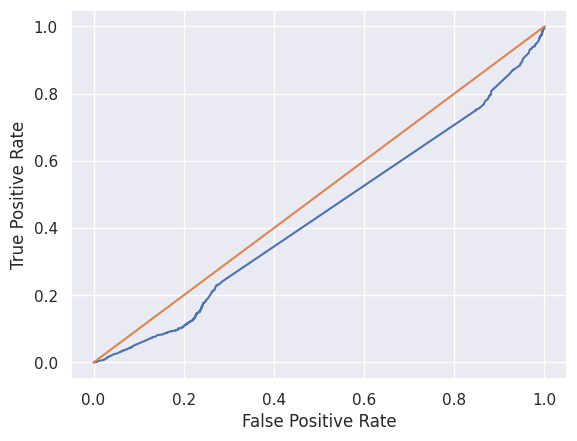

In [ ]:
plt.plot (lr_fpr,lr_tpr)
plt.plot (ns_fpr,ns_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

### Многоклассовая классификация

#### 10. [1 балл] Примените <a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html">OneVsOneClassifier</a> из sklearn к реализованной логистической регресии для того, чтобы получить многоклассовый линейный классификатор:
* используйте набор данных, подготовленный в задании 7
* разделите данные на тренировочную и тестовую выборки, выделив под test 0.3 всех предложений (не забудьте зафиксировать random state)
* с помощью GridSearchCV найдите оптимальные гиперпараметры моделей (согласно метрике F1 score)
* постройте confusion matrix для train и test
* вычислите другие метрики качества для обученной модели (удобно воспользоваться реализацией из sklearn)
* проанализируйте полученные значения метрик, сделайте вывод о качестве обученной модели

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [ ]:
X_train_trash, X_test_trash, y_train, y_test = train_test_split(df_chosen.sentence, df_chosen.author, test_size=0.3, random_state=42)

In [ ]:
X_train  = tf_vectorizer.transform(X_train_trash)
X_test  = tf_vectorizer.transform(X_test_trash)

In [ ]:
clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

  Dostoevsky       0.34      0.24      0.28      4536
       Gorky       0.35      0.13      0.19      3362
      Herzen       0.00      0.00      0.00       847
     Pushkin       0.00      0.00      0.00      1485
     Tolstoy       0.34      0.81      0.48      5980
    Turgenev       0.17      0.00      0.01      2390

    accuracy                           0.34     18600
   macro avg       0.20      0.20      0.16     18600
weighted avg       0.28      0.34      0.26     18600



In [ ]:
proba  = optimal.predict_proba(X_test)

In [ ]:
def show_results(test_y, pred, proba): #из сема
    print("Precision: {0:6.2f}".format(precision_score(test_y, pred, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(test_y, pred, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(test_y, pred, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(test_y, pred)))
  #  print("ROC-AUC: {0:6.2f}".format(roc_auc_score(test_y, proba[:,1], multi_class='ovo'),))
    labels = ['negative','positive']

    #classification_report
    sns.heatmap(data=confusion_matrix(test_y, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix ")
    plt.show()

Precision:   0.20
Recall:   0.20
F1-measure:   0.16
Accuracy:   0.34


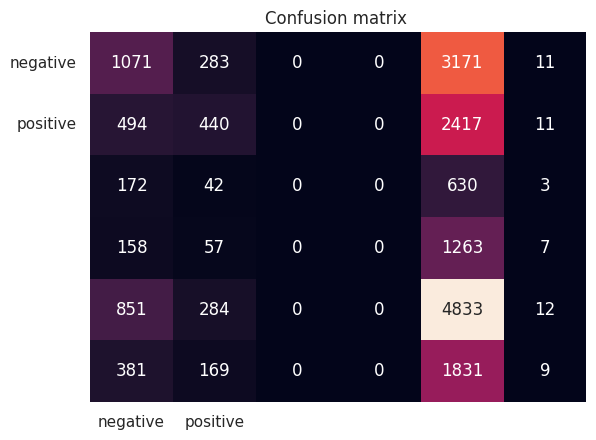

In [ ]:
show_results(y_test, y_pred, proba)

In [ ]:
"""
презижн 0.3 для самых многокнижных писателей, для остальных почти 0
в целом это круче, чем случайные результаты и норм для мегамногоклассовой классификации, но можно сказать, что модель плохая(
"""